<h1 style = "font-size:50px"> <font style = "background-color: #f2d1d9"> Data Visualizations in Python (Part 1) </h1>

<font size = 3><p>In this project, I will apply  the following visualizations:
<ol>
    <li>Line Chart</li>
    <li> Histogram </li>
    <li> Bar Charts</li>
    <li>  Pie Charts </li>
    <li>  Scatter Plot </li>
</ol>
Before applying each visualization, I will describe each plot and its syntax. </p>

In [49]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h1 id = "Import-Dataset" style = "background-color: skyblue; text-align:center;font-size:40px" >  Import Dataset </center></h1>  

<font size = 3> The dataset I used in this project is "imdb_top_1000.csv" which lists top 1000 films with the highest imdb rate. This is simple and straightforward dataset for different types of visualizations. Let's import the dataset and analyze it. </font>

In [50]:
films_data = pd.read_csv("imdb_top_1000.csv")
films_data.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [51]:
films_data.drop(["Poster_Link", "Overview"], axis = 1, inplace = True)
films_data.head(3)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


<h2 style = "background-color: skyblue" => <center> Data Wrangling </center></h2>  

<font size = 3>We should handle the missing data. Therefore, firstly, let's see how many missing values are there in each column.</font>

In [52]:
films_data.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

## Handle missing values in "Certificate" column

In [53]:
films_data["Certificate"].value_counts()

Certificate
U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64

In [54]:
films_data["Certificate"].fillna("Not Rated",inplace = True)

In [55]:
films_data.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## Handling missing values in "Meta_score" column

In [58]:
films_data["Meta_score"].isnull().sum()

0

In [57]:
films_data["Meta_score"].fillna("No score",inplace = True)

## Handling missing values in "Gross" column

In [59]:
films_data["Gross"].isnull().sum()

169

In [60]:
films_data["Gross"].dtype

dtype('O')

In [61]:
films_data["Gross"] = films_data["Gross"].str.replace("," , "" ,regex = True)
films_data["Gross"] = pd.to_numeric(films_data["Gross"], errors = "coerce")

In [62]:
films_data.dropna(subset = "Gross", inplace = True)

In [63]:
films_data["Gross"].isnull().sum()

0

The missing values are filled. Now we will analyze the data types of each column and do coversions if needed.

In [64]:
films_data.dtypes

Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Meta_score        object
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

In [65]:
print(films_data["Released_Year"].dtype)
print(films_data["Released_Year"].unique())

object
['1994' '1972' '2008' '1974' '1957' '2003' '1993' '2010' '1999' '2001'
 '1966' '2002' '1990' '1980' '1975' '2019' '2014' '1998' '1997' '1995'
 '1991' '1977' '1954' '2011' '2006' '2000' '1988' '1985' '1968' '1960'
 '1942' '1936' '1931' '2018' '2016' '2017' '2012' '2009' '2007' '1984'
 '1981' '1979' '1964' '1940' '2004' '1992' '1987' '1986' '1983' '1976'
 '1973' '1971' '1965' '1962' '1959' '1958' '1952' '1948' '1944' '1941'
 '1927' '1921' '2015' '2013' '2005' '1989' '1963' '1955' '1950' '1925'
 '1924' '1996' '1982' '1978' '1967' '1951' '1949' '1939' '1937' '1934'
 '1928' '1926' '1970' '1969' '1961' '1946' '1930' '1956' '1947' '1945'
 '1938' '1935' '1933' 'PG' '1953']


In [66]:
# Convert released_year to numeric value
films_data[films_data["Released_Year"] == "PG"]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0


In [67]:
films_data["Released_Year"].replace('PG', '1995', inplace = True)

In [68]:
films_data[films_data["Released_Year"] == "PG"]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


In [69]:
films_data["Released_Year"] = films_data["Released_Year"].astype(int)
films_data["Released_Year"].dtype

dtype('int32')

In [70]:
# Convert Runtime to numeric
films_data["Runtime"].unique()

array(['142 min', '175 min', '152 min', '202 min', '96 min', '201 min',
       '154 min', '195 min', '148 min', '139 min', '178 min', '161 min',
       '179 min', '136 min', '146 min', '124 min', '133 min', '132 min',
       '169 min', '130 min', '125 min', '189 min', '116 min', '127 min',
       '118 min', '121 min', '207 min', '122 min', '106 min', '112 min',
       '151 min', '150 min', '155 min', '119 min', '110 min', '88 min',
       '137 min', '165 min', '109 min', '102 min', '87 min', '126 min',
       '117 min', '181 min', '149 min', '105 min', '164 min', '170 min',
       '98 min', '101 min', '113 min', '134 min', '229 min', '115 min',
       '147 min', '95 min', '123 min', '131 min', '153 min', '108 min',
       '104 min', '89 min', '81 min', '99 min', '160 min', '114 min',
       '129 min', '228 min', '128 min', '103 min', '143 min', '107 min',
       '68 min', '138 min', '167 min', '163 min', '186 min', '135 min',
       '140 min', '180 min', '158 min', '210 min', '156 min'

In [71]:
films_data["Runtime"] = films_data["Runtime"].str.replace(" min", "")
films_data["Runtime"] = films_data["Runtime"].astype(int)
films_data["Runtime"].dtype

dtype('int32')

In [72]:
# Convert meta_score to numeric
films_data["Meta_score"].replace("No score", '0', inplace = True)
films_data["Meta_score"] = films_data["Meta_score"].astype(float)

In [73]:
films_data["Meta_score"].replace(np.NaN,0, inplace = True)

In [74]:
films_data[films_data["Meta_score"] == 0].head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
57,Dangal,2016,U,161,"Action, Biography, Drama",8.4,0.0,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh,Sanya Malhotra,156479,12391761.0
65,Taare Zameen Par,2007,U,165,"Drama, Family",8.4,0.0,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan,Tisca Chopra,168895,1223869.0
71,Once Upon a Time in America,1984,A,229,"Crime, Drama",8.4,0.0,Sergio Leone,Robert De Niro,James Woods,Elizabeth McGovern,Treat Williams,311365,5321508.0
79,Witness for the Prosecution,1957,U,116,"Crime, Drama, Mystery",8.4,0.0,Billy Wilder,Tyrone Power,Marlene Dietrich,Charles Laughton,Elsa Lanchester,108862,8175000.0
83,The Great Dictator,1940,Passed,125,"Comedy, Drama, War",8.4,0.0,Charles Chaplin,Charles Chaplin,Paulette Goddard,Jack Oakie,Reginald Gardiner,203150,288475.0


In [75]:
films_data.dtypes

Series_Title      object
Released_Year      int32
Certificate       object
Runtime            int32
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

In [76]:
films_data.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,831.000000,831.000000,831.000000,831.000000,8.310000e+02,8.310000e+02
mean,1993.919374,124.078219,7.946931,69.909747,3.152499e+05,6.803475e+07
std,21.135068,27.501455,0.283204,25.871560,3.436443e+05,1.097500e+08
min,1921.000000,45.000000,7.600000,0.000000,2.508800e+04,1.305000e+03
25%,1984.000000,104.000000,7.700000,66.000000,7.143000e+04,3.253559e+06
50%,2000.000000,120.000000,7.900000,76.000000,1.867340e+05,2.353089e+07
75%,2010.000000,138.000000,8.100000,85.500000,4.457210e+05,8.075089e+07
max,2019.000000,242.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


<h1 id = "Line Chart" style = "background-color: skyblue; text-align:center" >Line Chart</h2>   

Line Chart Information

<h2 style = "background-color: rgba(251,233,183,255)"> <center> Film Counts - Released Year Line chart (Seaborn) </center></h2>

<font size = 3> Count the number of films per year, by using the <b>groupby method </b> </font>

In [77]:
films_per_year = films_data.groupby(films_data["Released_Year"])
films_per_year = films_per_year.size().reset_index(name = "Count")
films_per_year

,Released_Year,Count
0,1921,1
1,1924,1
2,1925,2
3,1926,1
4,1927,2
...,...,...
89,2015,23
90,2016,23
91,2017,20
92,2018,14


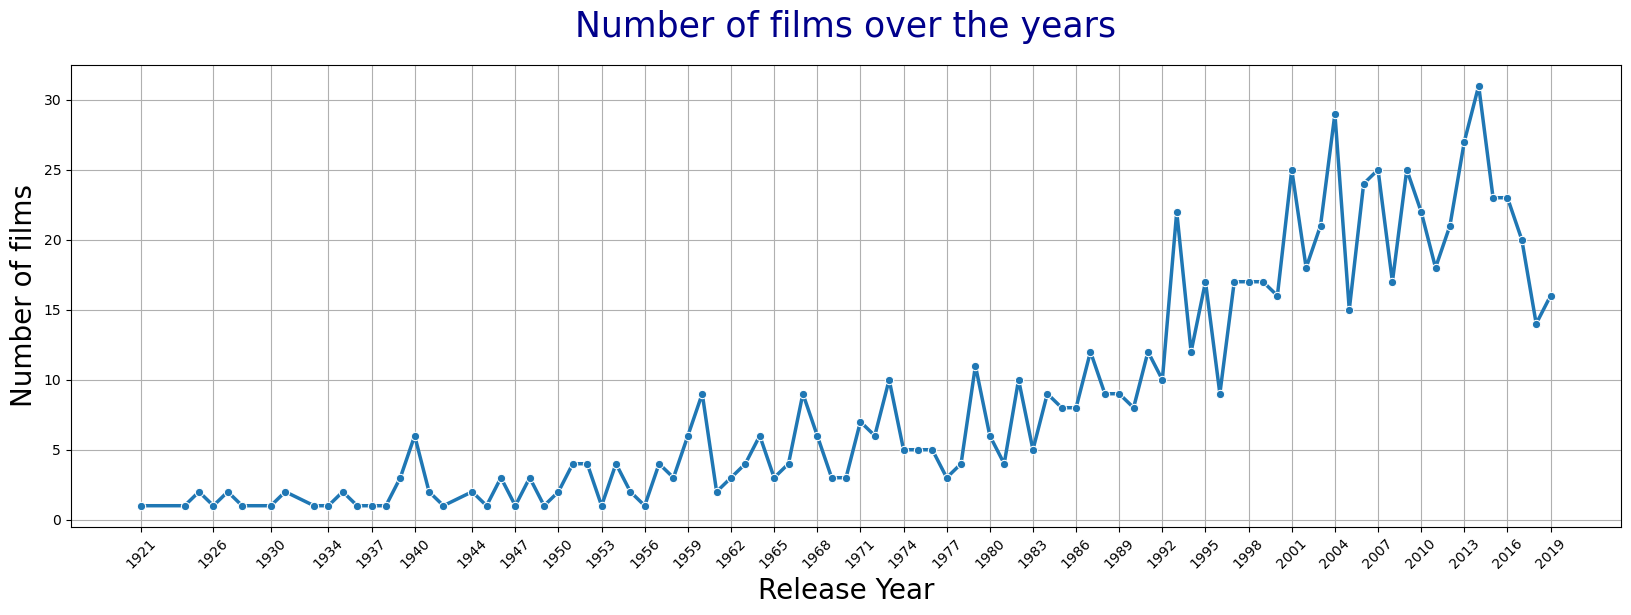

In [78]:
plt.figure(figsize = (20,6))
sns.lineplot(x = films_per_year["Released_Year"], y = "Count", data = films_per_year, marker = "o", linewidth = 2.5)
plt.grid()
plt.title("Number of films over the years",fontsize=25, color = "darkblue",pad = 20)
plt.xlabel("Release Year", fontsize = 20)
plt.ylabel("Number of films", fontsize = 20)
plt.xticks(ticks = films_per_year["Released_Year"][0:105:3], rotation = 45)
plt.show()

<font size = 3> The line chart indicates that the number of films changes rapidly over the years, but in general, it is highest between 2001 and 2016. </font>

<h2 style = "background-color: rgba(251,233,183,255)"><center> IMDB Rating - Released Year (Matplotlib) </h2>

In [80]:
imdb_rate_for_years = films_data.groupby("Released_Year")["IMDB_Rating"].mean()

In [81]:
imdb_rate_for_years.head()

Released_Year
1921    8.3
1924    8.2
1925    8.1
1926    8.1
1927    8.2
Name: IMDB_Rating, dtype: float64

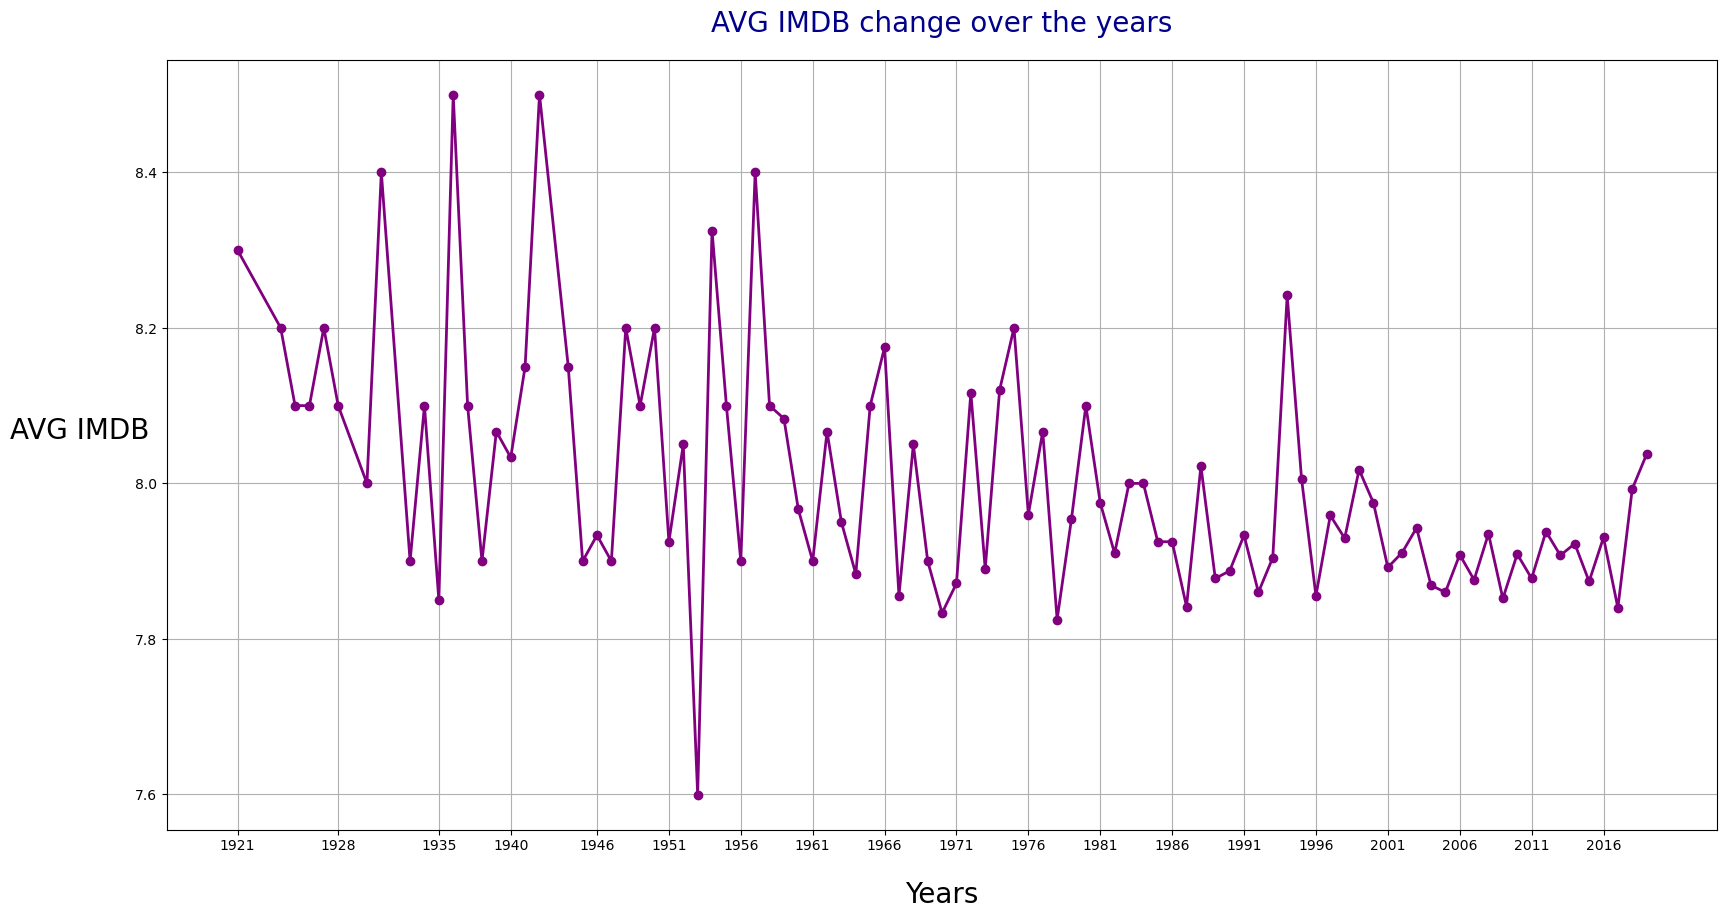

In [83]:
imdb_rate_for_years.plot(kind = "line", figsize = (20,10), marker = "o", grid = True, color = "purple", linewidth = 2)
plt.xlabel("Years", fontsize = 20, labelpad = 20)
plt.ylabel("AVG IMDB", fontsize = 20,labelpad = 40, rotation = 0)
plt.title("AVG IMDB change over the years", fontsize = 20, pad = 20, color = "darkblue")
plt.xticks(films_per_year["Released_Year"][0:105:5]);

<b><font size =3, color = "red"> Important question:</b> </font>
<font size = 3> <p>When we draw line chart by using Seaborn library, we added reset_index() method which converts the resulted groupby series into the pandas dataframe, and add the index column. However, when we used Pandas library for drawing line chart, we did not use reset_index() method, and hence we used pandas series. What is the reason? </p> </font>

<b> <font size= 3, color = "green">Answer: </b>

<p> <font size =3>
    <li>Seaborn library takes the columns from the dataframe, and is good for working with the dataframes. We explicitly write x and y as columns of the dataframe in the Seaborn plot.  </li> </font> </p>

 ``` python
    df_for_sns = df.groupby(df["col1"]).reset_index()
    sns.lineplot(x = col1, y = col2, data = df)    
```

<p> <font size = 3>
<li>Pandas library automatically takes the index column as the x axis. Therefore, when we add index column with reset_index() method, pandas will take the index column as x axis, and that will show the wrong results. Therefore, we did not add index column. </li></p>

```python
    df_for_pandas = df.groupby(df["col1"])
    df_for_pandas.plot(kind = "line")
```



<p> <font size =3> <li>
However, if you want to draw line chart with Pandas by using dataframe, then we can avoid the above issue by explicitly notating the x column and y columns. </li></font></p>
    
```python
    df_for_pandas = df.groupby(df["col1"]).reset_index()
    df_for_pandas.plot(x = col1, y = col2, kind = "line")

```




</p>

<h2 style = "background-color: rgba(251,233,183,255)"><center> Gross - Years (Seaborn) </h2>

In [84]:
films_data["Gross"] = films_data["Gross"].str.replace(",", "").astype(float)

AttributeError: Can only use .str accessor with string values!

In [85]:
gross_over_years = films_data.groupby("Released_Year")["Gross"].mean().reset_index()
gross_over_years

,Released_Year,Gross
0,1921,5.450000e+06
1,1924,9.773750e+05
2,1925,2.750485e+06
3,1926,1.033895e+06
4,1927,8.878530e+05
...,...,...
89,2015,1.070581e+08
90,2016,1.128503e+08
91,2017,1.030656e+08
92,2018,1.862684e+08


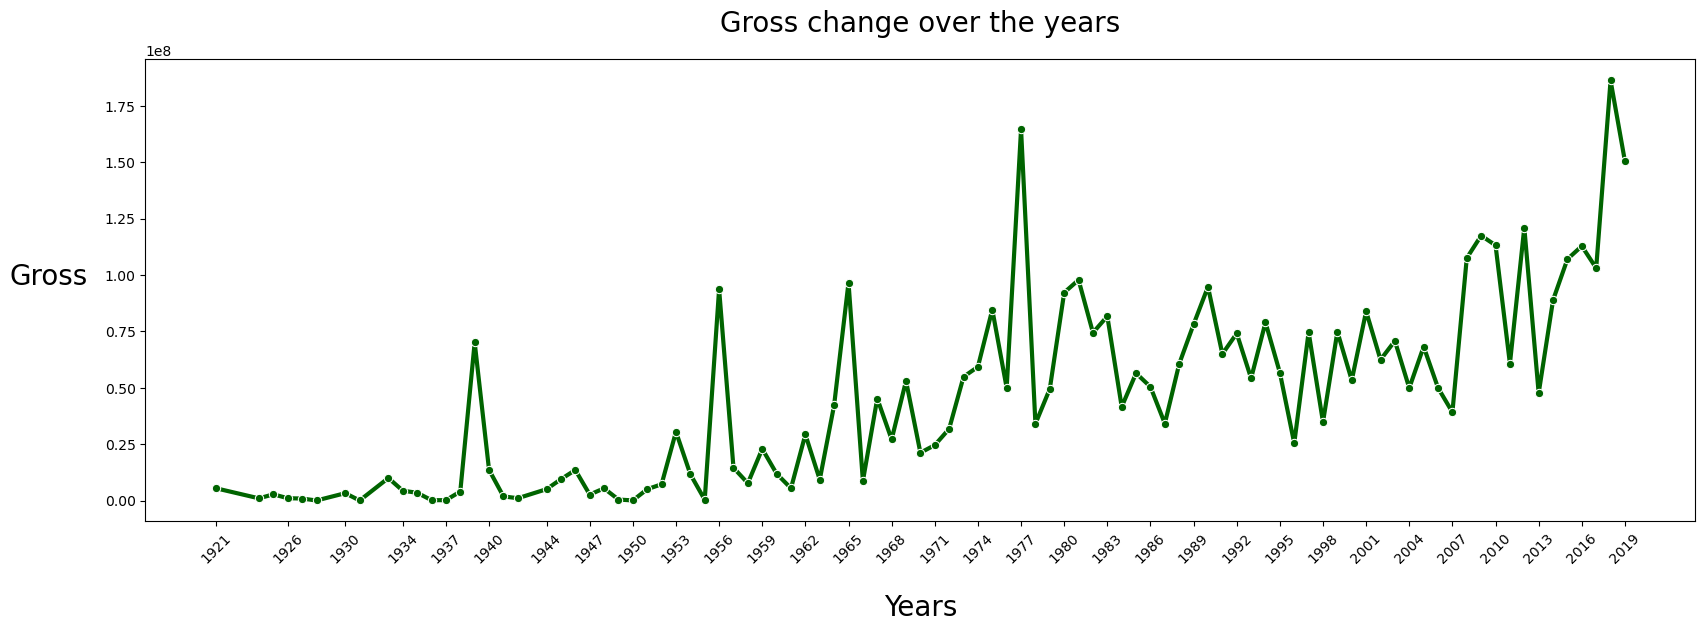

In [86]:
plt.figure(figsize = (20,6))
sns.lineplot(x = gross_over_years["Released_Year"], y = gross_over_years["Gross"], data = gross_over_years,
            marker = "o", color = "darkgreen", linewidth = 3)
plt.xlabel('Years', fontsize = 20, labelpad = 20)
plt.ylabel('Gross', fontsize = 20, labelpad = 40, rotation = 0)
plt.title('Gross change over the years', fontsize = 20, pad = 20)
plt.xticks(gross_over_years["Released_Year"][0:100:3], rotation = 45);

<h1 style = "background-color: skyblue" => <center> Histogram </center></h2>   

<p><font size = 3>
A <b> <a href = "https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html">  histogram </a> </b> is a type of graphical representation that displays the distribution of a dataset. It consists of bars where <b><i>each bar represents the frequency (or count) of data points</i></b> within a specific range or <b>"bin"</b>. The <b>X-axis of a histogram represents the intervals or bins</b> into which the data is grouped, while the <b>Y-axis shows the number of data points falling within each bin</b>.</p> </font>
<p><font size = 3>
<i><b><font color = "red">Histograms are primarily used to visualize the distribution of continuous data </font></i></b>, helping to understand its spread, central tendency, and the presence of any patterns or outliers. By summarizing large amounts of data, histograms allow for easier identification of the data's shape, such as whether it follows a <b><i>normal distribution</b></i>, has <b><i>skewness</b></i>, or shows <b><i>gaps</b></i>. They are commonly used in data analysis, statistics, and machine learning to assess the underlying structure of the data before further processing or modeling.</p></font>

In [87]:
films_data.head(3)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0


<h2 style = "background-color: rgba(251,233,183,255)"><center> Film Counts - Meta score (Seaborn) </h2>

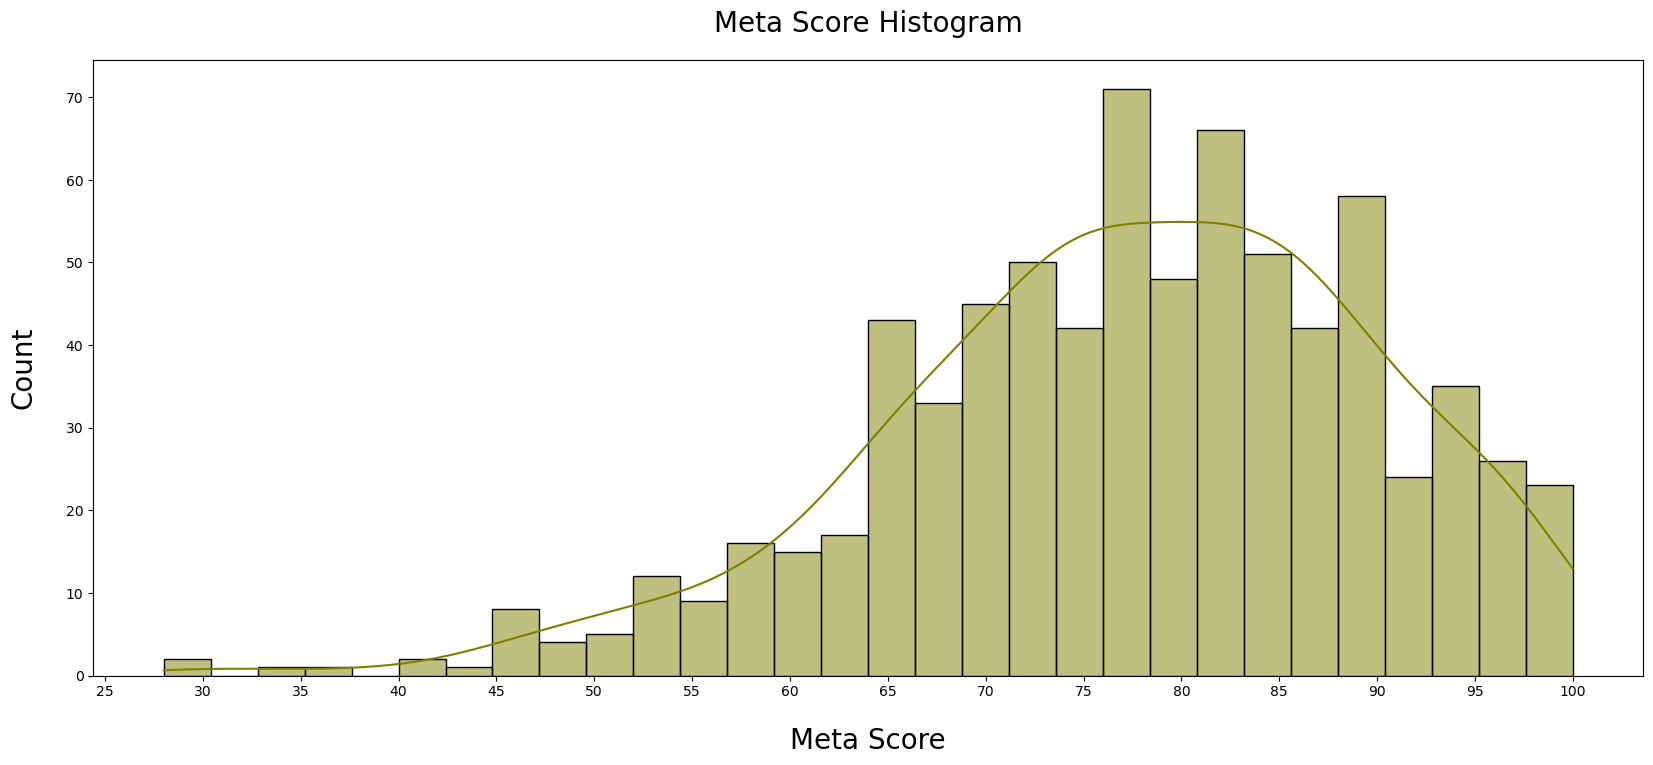

In [88]:
plt.figure(figsize = (20,8))
sns.histplot( x = films_data[films_data["Meta_score"] != 0] ["Meta_score"], bins = 30, kde = True,
            color = "olive")
plt.xlabel("Meta Score", fontsize = 20, labelpad = 20)
plt.ylabel("Count", fontsize = 20, labelpad = 20)
plt.title("Meta Score Histogram", fontsize = 20, pad = 20)
plt.xticks ([25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]);

In [89]:
films_data[films_data["Meta_score"] != 0] ["Meta_score"]

0       80.0
1      100.0
2       84.0
3       90.0
4       96.0
       ...  
990     77.0
991     50.0
992     65.0
994     96.0
997     85.0
Name: Meta_score, Length: 750, dtype: float64

<h2 style = "background-color: rgba(251,233,183,255)"><center> Film counts - IMDB Rate (Pandas) </h2>

Text(0, 0.5, 'Count')

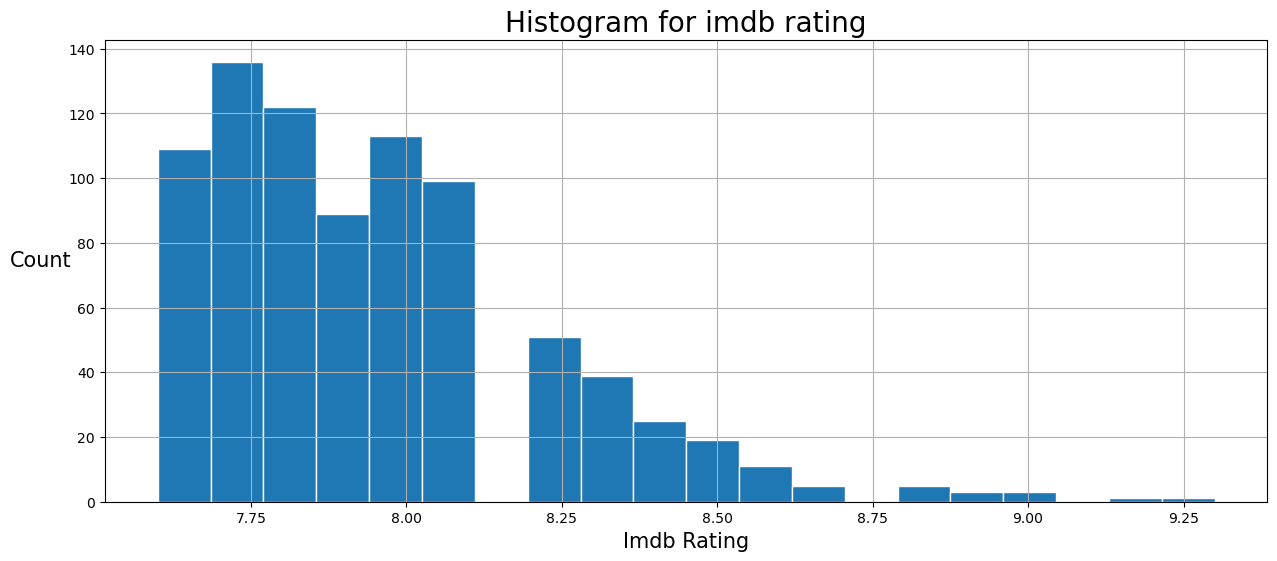

In [90]:
films_data.hist("IMDB_Rating", bins = 20, edgecolor = "white", figsize = (15,6))
plt.xlabel("Imdb Rating", fontsize = 15)
plt.title("Histogram for imdb rating",fontsize = 20)
plt.ylabel("Count", fontsize = 15, rotation = 0,labelpad = 20)

<h2 style = "background-color: rgba(251,233,183,255)"><center> Gross - Count (Seaborn) </h2>

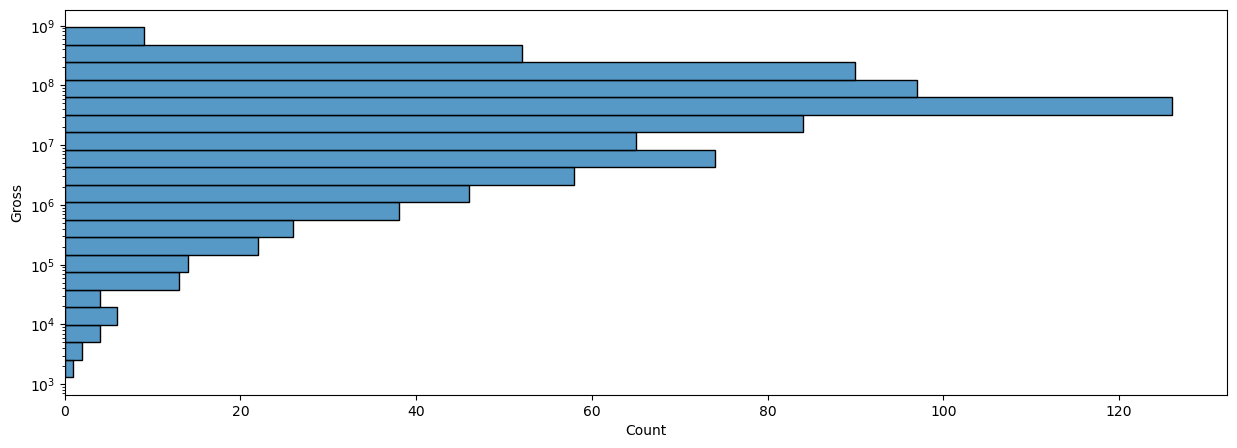

In [91]:
plt.figure(figsize = (15,5))
sns.histplot(y = films_data["Gross"],  log_scale = True)
plt.yscale("log")

<h1 style = "background-color: skyblue" => <center> Bar Chart </center></h2>   

<font size = 3><p>A  <b>bar chart</b> is a type of data visualization that represents <i>categorical data</i> using rectangular bars. Each bar's length or height is proportional to the value it represents. The bars can be displayed vertically or horizontally, depending on the preference and the type of data being visualized. Bar charts are commonly used to compare different categories or track changes over time when the time intervals are large. They help in identifying trends, patterns, and differences among groups, making them useful for business analysis, financial data, and survey results. Unlike histograms, which are used for continuous data, <b>bar charts are best suited for discrete categories</b> such as movie genres, product sales, or survey responses. By visually representing data, bar charts make it easier to interpret and compare information at a glance. </p> </font>

<font size = 3> <p>
Several methods can be used to create bar charts in Python using different libraries.

<li>With Pandas, the <font color = "Red"><b>plot(kind='bar') </b></font> or <font color = "Red"><b>.plot.bar()</b></font> method can be used directly on a DataFrame or Series to generate a bar chart.</li>

<li>In Matplotlib, <font color = "Red"><b> plt.bar() </b></font > is the primary function for creating bar charts, where you specify the categories on the x-axis and their corresponding values on the y-axis. </li>
<li> Seaborn also provides the <font color = "Red"><b>sns.barplot()</b></font> function, which automatically calculates and plots bar charts, often with error bars, making it useful for statistical analysis. These methods provide flexibility in customization, such as adding labels, changing colors, adjusting bar widths, and modifying the figure's appearance to enhance readability and presentation quality. </li>
</p>

In [92]:
films_data.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


<h2 style = "background-color: rgba(251,233,183,255)"><center> Runtime min - Certificate Bar Plot (Seaborn) </h2>

Text(0.5, 1.0, 'Average runtime per certificate')

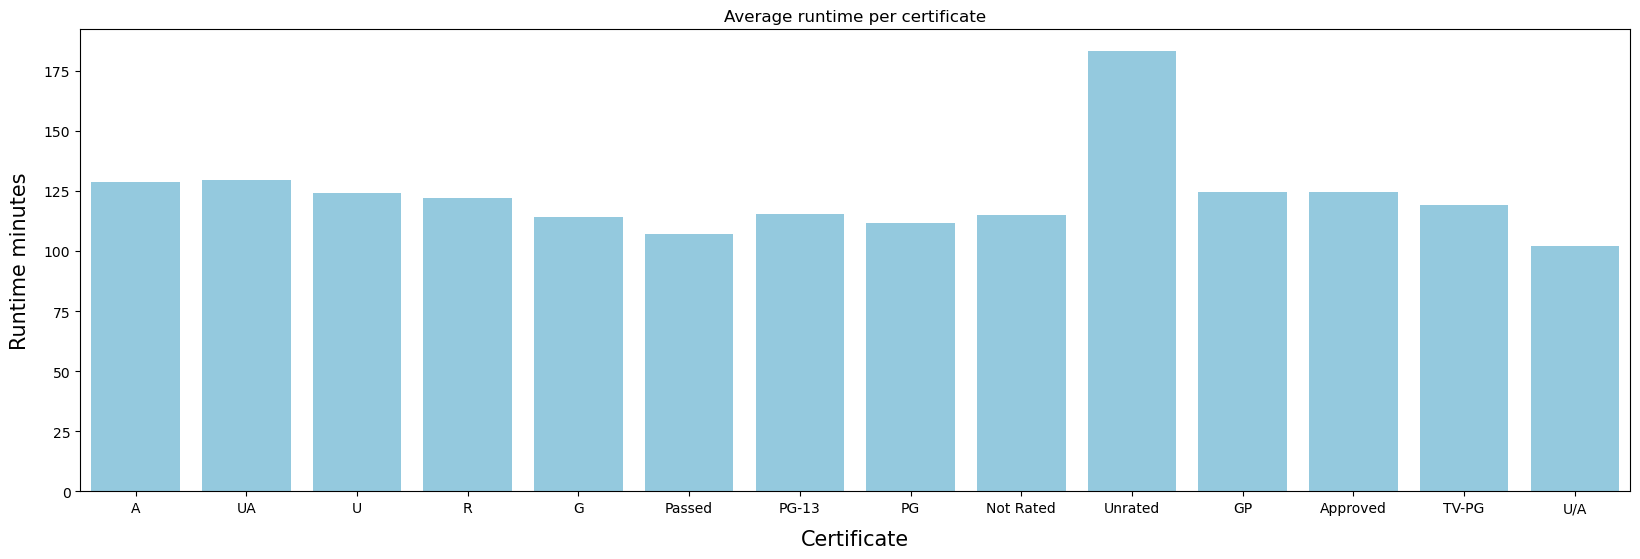

In [93]:
plt.figure(figsize = (20,6))
sns.barplot(x = "Certificate", y = "Runtime", data = films_data, errorbar = None, color = "skyblue")
plt.ylabel("Runtime minutes", fontsize = 15, labelpad = 10)
plt.xlabel("Certificate", fontsize = 15, labelpad = 10)
plt.title("Average runtime per certificate")

<h2 style = "background-color: rgba(251,233,183,255)"><center> Genre - Count Horizontal Bar Plot (Pandas) </h2>

In [94]:
films_per_genre = films_data.groupby("Genre").size().reset_index()
films_per_genre.columns = ["Genre", "Count"]

In [95]:
films_per_genre.sort_values("Count",ascending = False,inplace = True)
films_per_genre = films_per_genre.head(20)

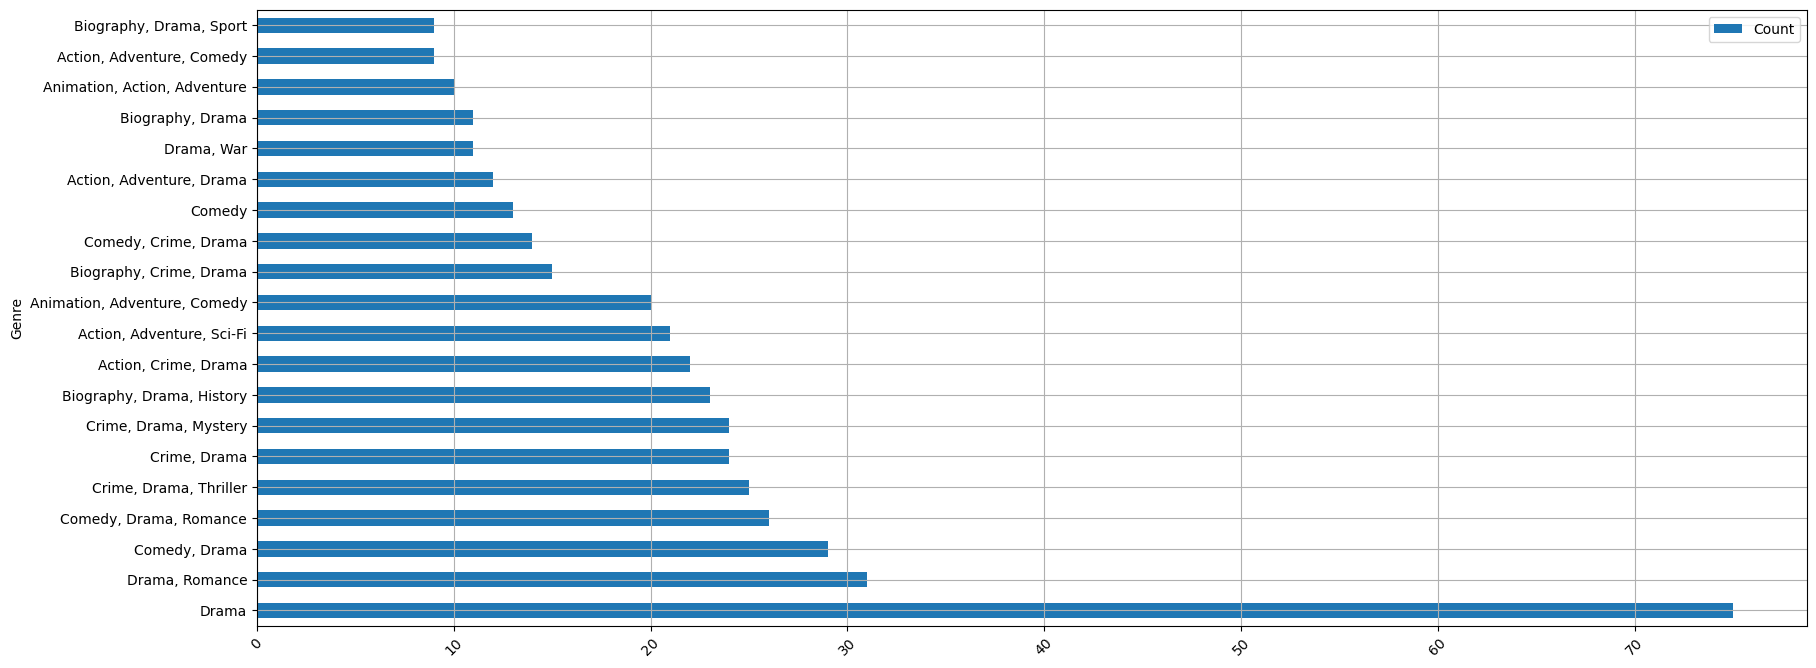

In [96]:

films_per_genre.plot(kind = "barh", x = "Genre", y = "Count", figsize = (20,8))
plt.xticks(rotation = 45);
plt.grid()

<h2 style = "background-color: rgba(251,233,183,255)"><center> Runtime - Meta Score (Matplotlib) </h2>

1. Group the data by "IMDB_Rating" and calculate the average runtime for each rating.
2. Sort the values to make the chart more readable.
3. Plot the data using plt.bar().
4. Label the axes and title the chart for better understanding.

In [97]:
filtered_data = films_data[films_data["Meta_score"]>0]

Text(0, 0.5, 'Runtime')

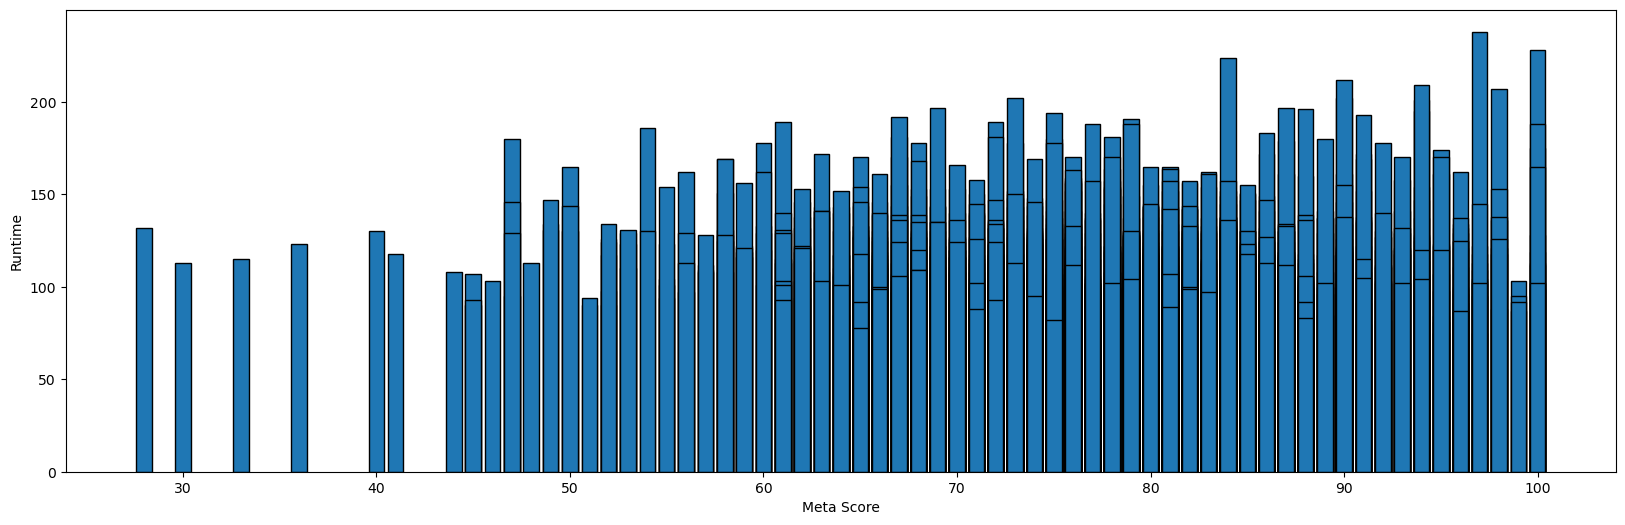

In [98]:
plt.figure(figsize = (20,6))
plt.bar(x = filtered_data["Meta_score"],height = filtered_data["Runtime"],edgecolor = "black" )
plt.xlabel("Meta Score")
plt.ylabel("Runtime")

<h1 style = "background-color: skyblue" => <center> Pie Chart </center></h2>   

<font size = 3>
<p>A <b> pie chart </b> is a circular statistical graphic used to <b>represent categorical data </b> as proportional slices of a whole. It is particularly useful for showing the relative distribution of different categories within a dataset. Each slice corresponds to a category, and its size is proportional to the percentage or frequency of that category in the dataset. Pie charts are most effective when visualizing nominal (qualitative) or ordinal variables, such as market share, survey results, or demographic distributions. However, they are not ideal for comparing small differences between categories, as bar charts or other visualizations may be more effective. Several libraries help generate pie charts in Python, including <b> <font color = "red">Matplotlib (plt.pie()) </font> </b> and <font color = "red"><b> Pandas (plot.pie()) </font> </b>. These libraries provide customization options such as labels, colors, explode effects, and percentage display to enhance readability.
</font>

In [99]:
films_data.head(2)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0


<h2 style = "background-color: rgba(251,233,183,255)"><center> Genre - Count (Matplotlib) </h2>

In [100]:
genre_data = films_data.groupby("Genre").size().reset_index(name = "Count")
genre_data.sort_values("Count", ascending = False, inplace = True)
genre_data = genre_data.head(15)
genre_data

,Genre,Count
124,Drama,75
155,"Drama, Romance",31
91,"Comedy, Drama",29
96,"Comedy, Drama, Romance",26
119,"Crime, Drama, Thriller",25
110,"Crime, Drama",24
116,"Crime, Drama, Mystery",24
80,"Biography, Drama, History",23
20,"Action, Crime, Drama",22
9,"Action, Adventure, Sci-Fi",21


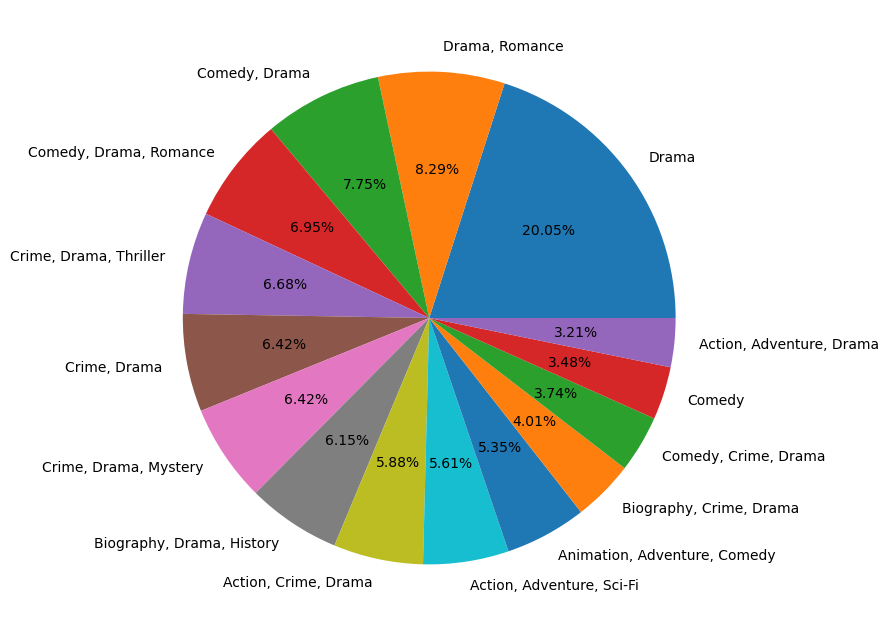

In [101]:
plt.figure(figsize = (12,8))
plt.pie(x = genre_data["Count"], labels = genre_data["Genre"], autopct='%2.2f%%');

In [102]:
films_data.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

<h2 style = "background-color: rgba(251,233,183,255)"><center> Runtime - Certificate (Pandas) </h2>

In [103]:
runtime_certificate_data = films_data.groupby("Certificate")["Runtime"].mean()

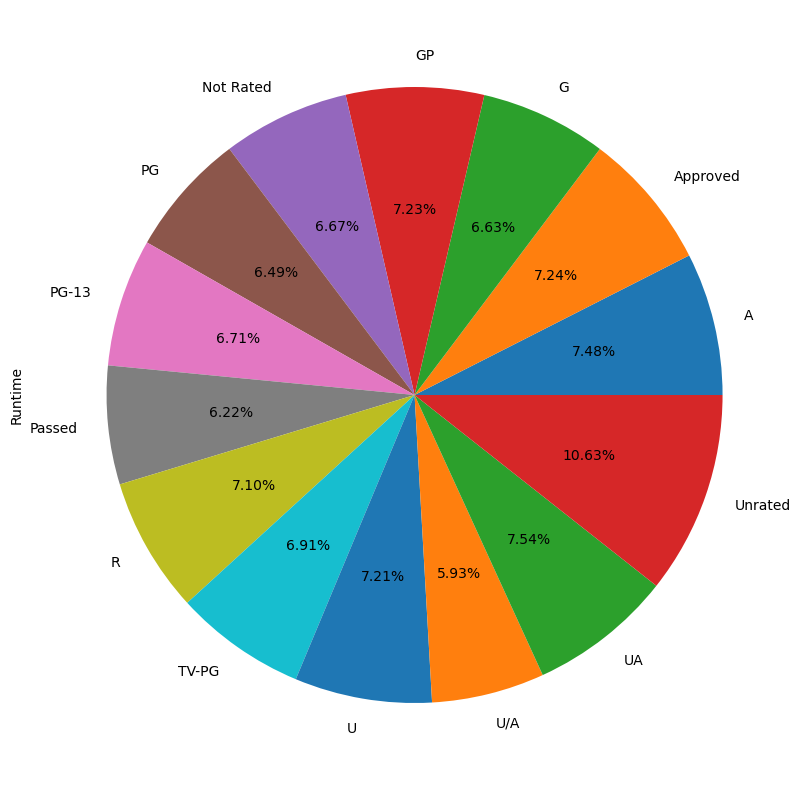

In [104]:
plt.figure(figsize = (15,10))
runtime_certificate_data.plot(kind = "pie", autopct = "%1.2f%%");

<h2 style = "background-color: rgba(251,233,183,255)"><center> Count - IMDB_Rating (Matplotlib) </h2>

In [105]:
rate_count = films_data.groupby("IMDB_Rating").size().reset_index(name = "Count")
rate_count = rate_count.head(10)

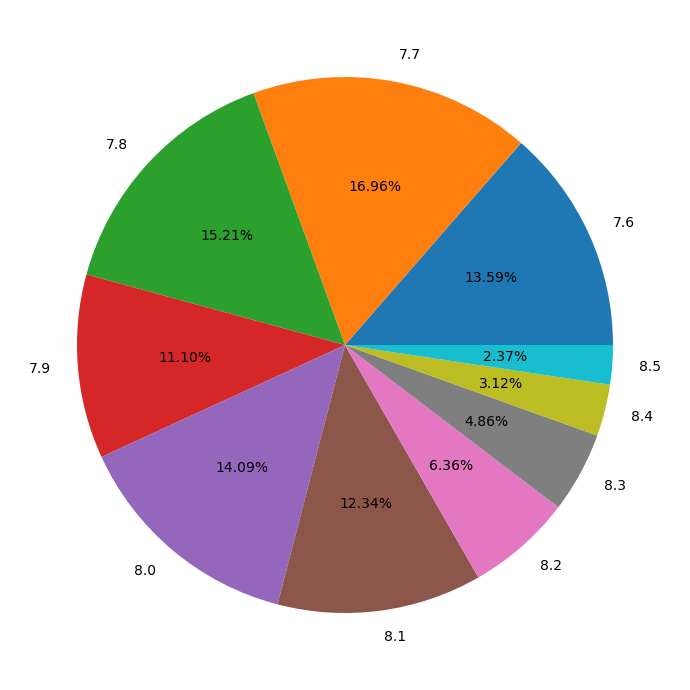

In [106]:
plt.figure(figsize = (8,7))
colors = sns.color_palette("Set3", len(rate_count))
plt.pie(x = rate_count["Count"], labels = rate_count["IMDB_Rating"], autopct = "%1.2f%%")
plt.tight_layout();

<h1 style = "background-color: skyblue" => <center> Scatter Plot </center></h2>   

<font size = 3><p>A <b>scatter plot</b> is a type of data visualization used to represent the relationship between two numerical variables. Each point on the scatter plot corresponds to an individual data observation, with its position determined by values on the x-axis and y-axis. Scatter plots are particularly useful for identifying trends, correlations, and patterns in data, such as positive or negative relationships between variables. If the points are clustered along an upward or downward trend, it indicates a correlation. Additionally, scatter plots help detect outliers and anomalies in datasets. In Python, scatter plots can be created using <font color = "red"><b>Matplotlib (plt.scatter())</b> </font>, <font color = "red"><b>Seaborn (sns.scatterplot()) </b></font>, and <font color = "red"><b>Pandas (df.plot.scatter())<b></font>, each offering various customization options such as color, size, and transparency to enhance data interpretation. </p> </font>
<font size = 3><p> Since a scatter plot is used to visualize the relationship between two numerical variables, both axes must contain continuous data. </p> </font>

In [107]:
films_data.head(2)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0


<h2 style = "background-color: rgba(251,233,183,255)"><center> IMDB_Rating - Meta Score (Matplotlib) </h2>

In [108]:
filtered_data = films_data[films_data["Meta_score"] > 0]

Text(0.5, 1.0, 'IMDB vs Meta score')

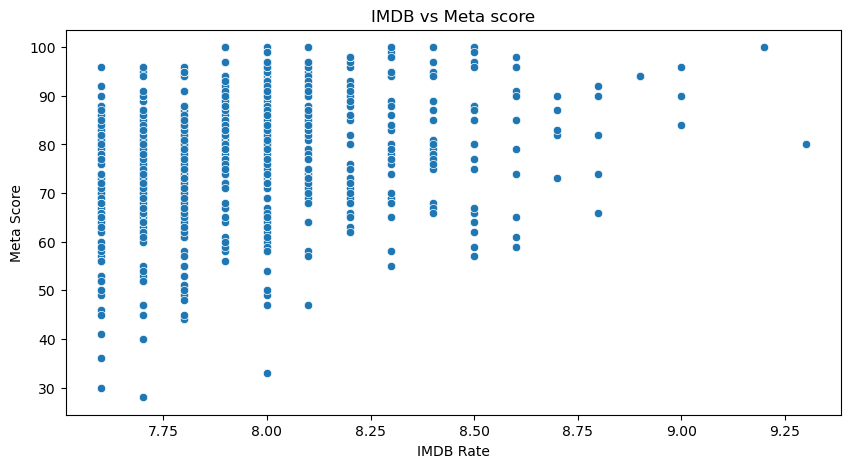

In [109]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = filtered_data, x = filtered_data["IMDB_Rating"],y =filtered_data["Meta_score"])
plt.xlabel("IMDB Rate")
plt.ylabel("Meta Score")
plt.title("IMDB vs Meta score")

### IMDB VS GROSS with Seaborn

Text(0.5, 1.0, 'Gross vs IMDB')

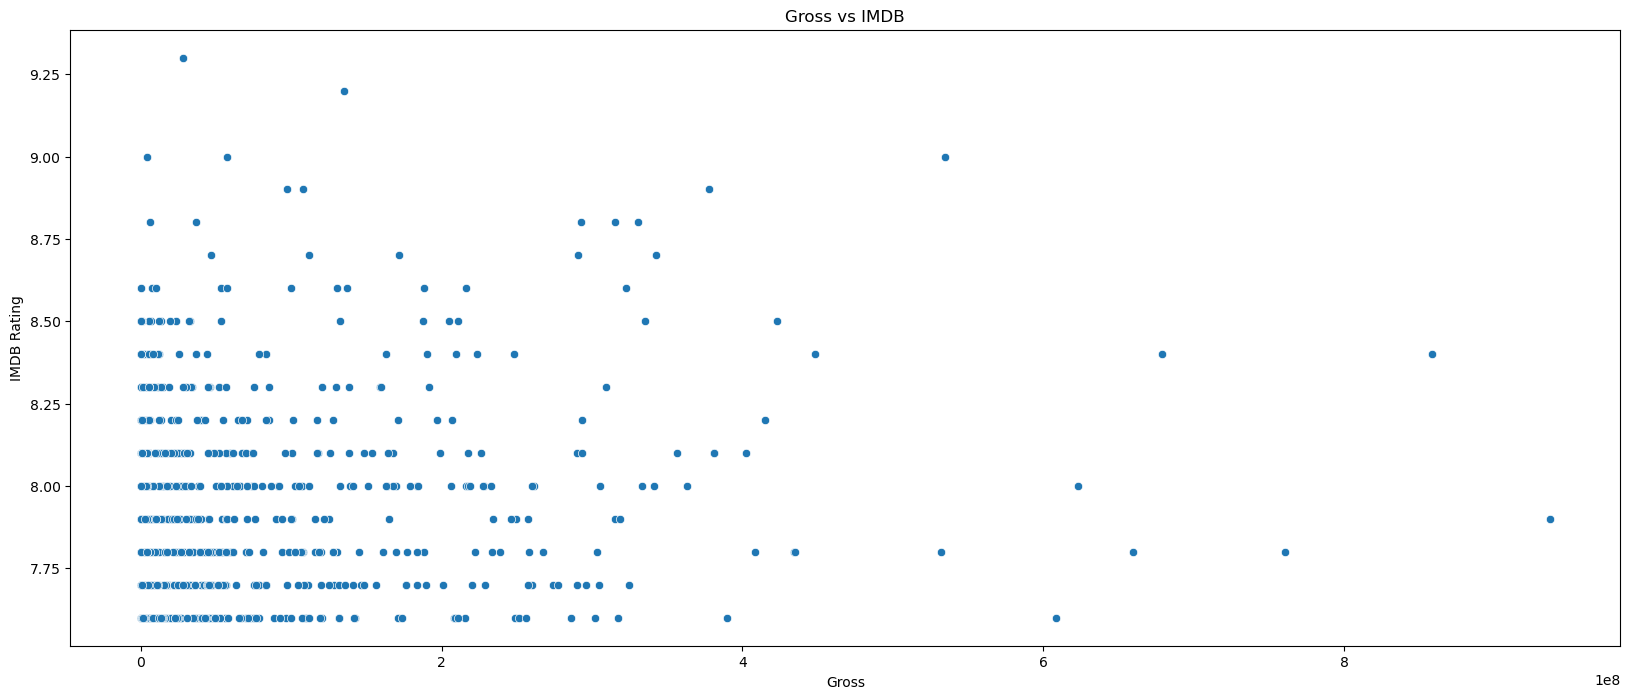

In [110]:
plt.figure(figsize = (20,8))
sns.scatterplot(data = films_data, x = films_data["Gross"], y = films_data["IMDB_Rating"])
plt.xlabel("Gross", fontsize = 10)
plt.ylabel("IMDB Rating", fontsize = 10)
plt.title("Gross vs IMDB")

### Meta Score vs Gross with Seaborn

Text(0.5, 1.0, 'Gross vs Meta score')

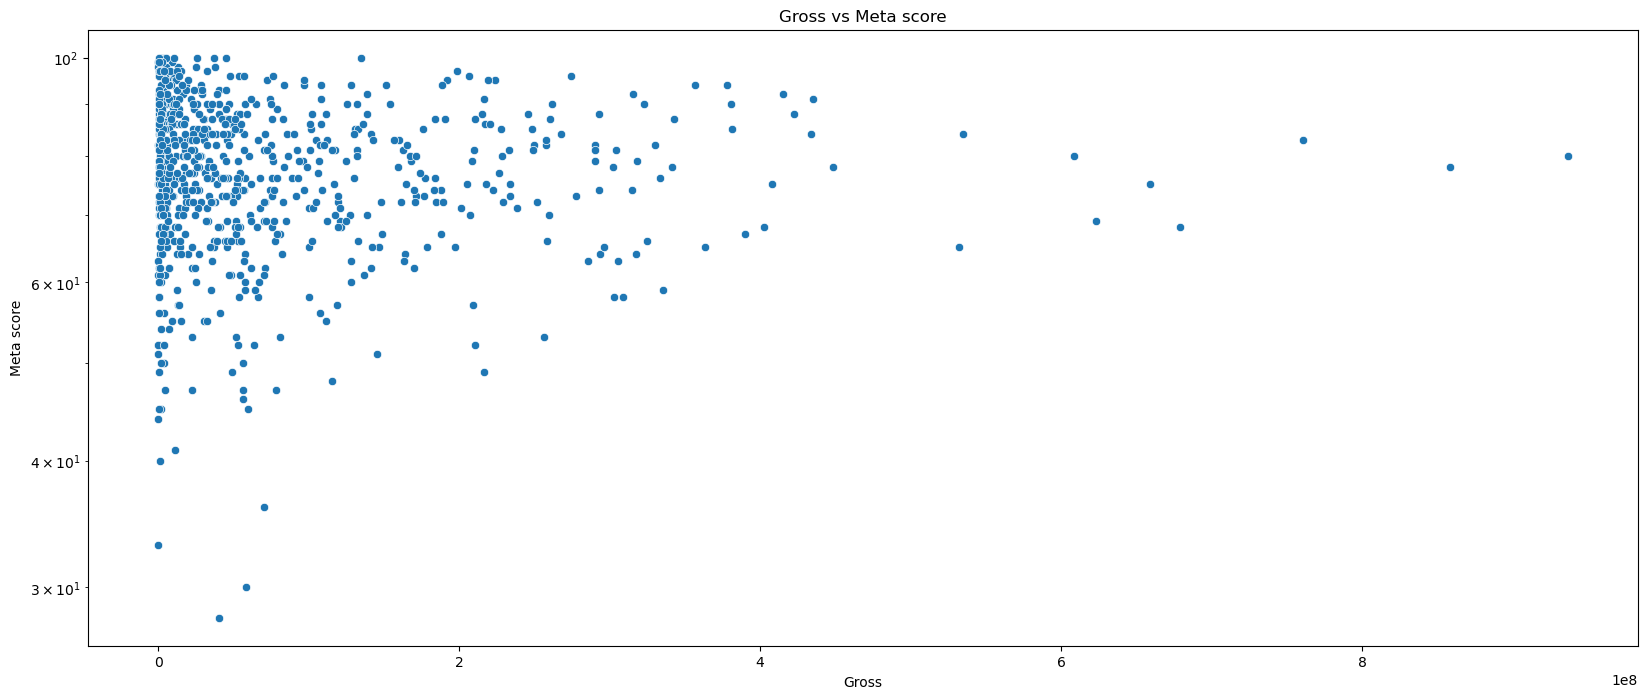

In [111]:
plt.figure(figsize = (20,8))
sns.scatterplot(data = films_data, x = films_data["Gross"], 
                y = films_data[films_data["Meta_score"]>0]["Meta_score"])
plt.xlabel("Gross", fontsize = 10)
plt.ylabel("Meta score", fontsize = 10)
plt.yscale("log")
plt.title("Gross vs Meta score")

### Runtime vs Gross 

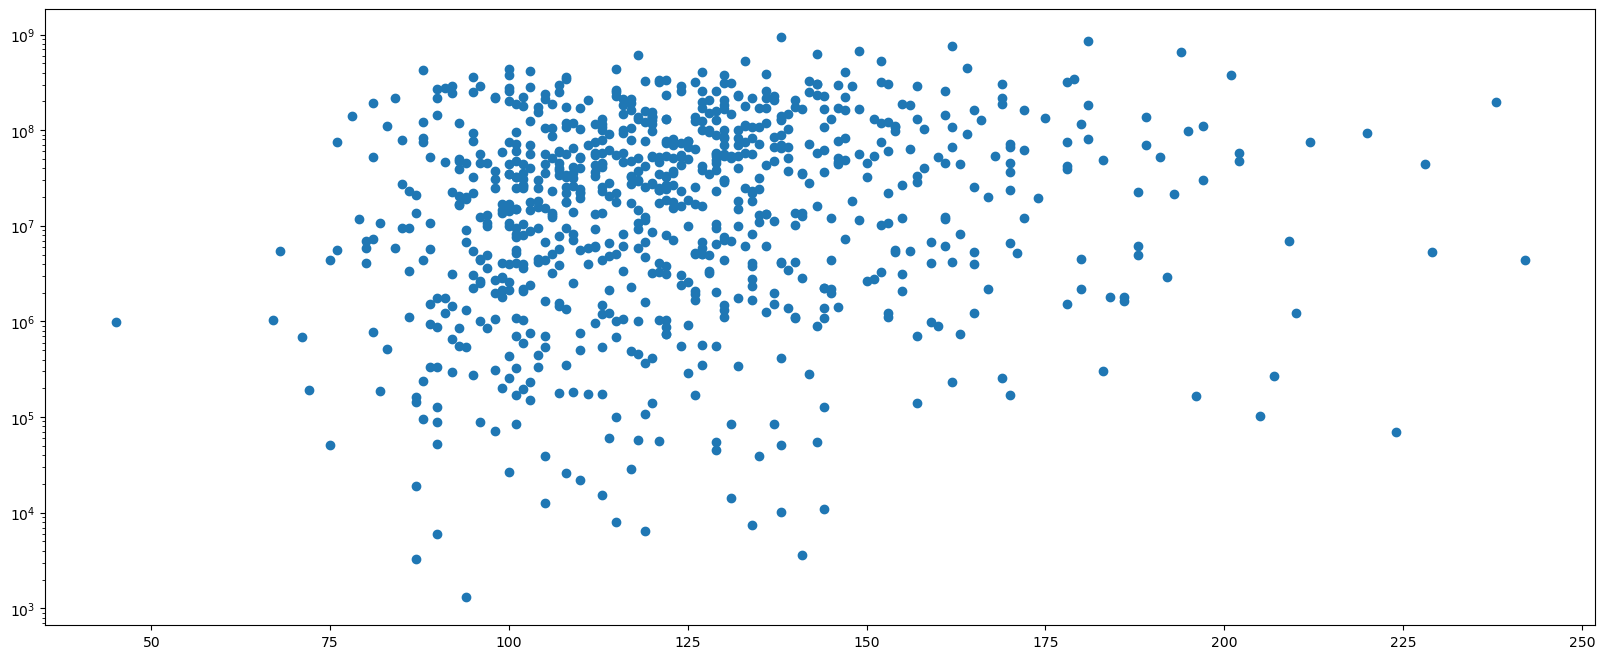

In [112]:
plt.figure(figsize = (20,8))
plt.scatter(x = films_data["Runtime"], y = films_data["Gross"])
plt.yscale("log")

In [113]:
films_data["Gross"].shape

(831,)